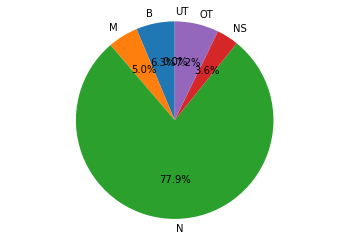

In [1]:
import os
import matplotlib.pyplot as plt

# Specify the path to the directory
path = r'C:\Users\GHB\Desktop\Test dataset\Extrinsic data\Task data'

# Get a list of all the subdirectories in the path
subdirs = [x[0] for x in os.walk(path)][1:]

# Count the number of files in each subdirectory
counts = [len(os.listdir(x)) for x in subdirs]

# Calculate the percentage of files in each subdirectory
total_files = sum(counts)
percentages = [(count/total_files)*100 for count in counts]

# Create a pie chart
labels = [os.path.basename(x) for x in subdirs]
fig1, ax1 = plt.subplots()
ax1.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# Show the pie chart
plt.show()

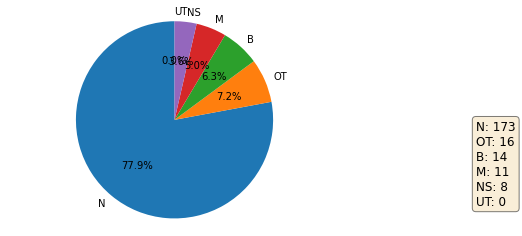

In [3]:
import os
import matplotlib.pyplot as plt

# Specify the path to the directory
path = r'C:\Users\GHB\Desktop\Test dataset\Extrinsic data\Task data'

# Get a list of all the subdirectories in the path
subdirs = [x[0] for x in os.walk(path)][1:]

# Count the number of files in each subdirectory
counts = [len(os.listdir(x)) for x in subdirs]

# Sort the subdirectories by the number of files they contain
subdirs, counts = zip(*sorted(zip(subdirs, counts), key=lambda x: x[1], reverse=True))

# Calculate the percentage of files in each subdirectory
total_files = sum(counts)
percentages = [(count/total_files)*100 for count in counts]

# Create a pie chart
labels = [os.path.basename(x) for x in subdirs]
fig1, ax1 = plt.subplots()
ax1.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

# Add a text box with the number of files in each subdirectory
textstr = '\n'.join([f'{label}: {count}' for label, count in zip(labels, counts)])
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax1.text(1.4, 0.5, textstr, transform=ax1.transAxes, fontsize=12, verticalalignment='top', bbox=props)

# Show the pie chart
plt.show()

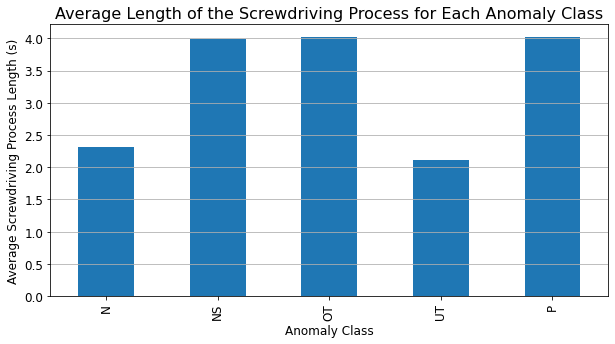

In [23]:
# Visualisaton of time

import pandas as pd
import matplotlib.pyplot as plt
import os

# create a dictionary to store the length of the process for each folder
folder_lengths = {}

# list of folders
folders = [r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\N", r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\NS",
           r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\OT", r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\UT",
           r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\P"]

for folder in folders:
    total_length = 0
    file_count = 0
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(f'{folder}/{file}')
            # assuming the "Time (ms)" column is in time order
            total_length += df['Time (ms)'].max() - df['Time (ms)'].min()
            file_count += 1
    # convert from milliseconds to seconds and calculate average
    average_length = total_length / 1000 / file_count
    folder_name = os.path.basename(folder)
    folder_lengths[folder_name] = average_length

# convert the dictionary to a pandas Series for easier plotting
lengths_series = pd.Series(folder_lengths)

# create the bar chart
plt.figure(figsize=(10,5))
lengths_series.plot(kind='bar')
plt.xlabel('Anomaly Class', fontsize=12)
plt.ylabel('Average Screwdriving Process Length (s)', fontsize=12)

plt.title('Average Length of the Screwdriving Process for Each Anomaly Class', fontsize=16)

# increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)
# add a grid
plt.grid(axis='y')
plt.show()



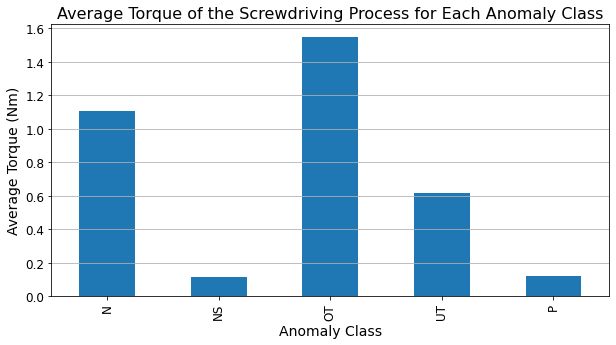

In [22]:
# Visualisation of torque

import pandas as pd
import matplotlib.pyplot as plt
import os

# create a dictionary to store the average torque for each folder
folder_torques = {}

# list of folders
folders = [r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\N", r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\NS",
           r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\OT", r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\UT",
           r"C:\Users\GHB\Desktop\SCREW PROJECT\Machine Learning\Final data\Intrinsic data\P"]

for folder in folders:
    total_torque = 0
    file_count = 0
    for file in os.listdir(folder):
        if file.endswith(".csv"):
            df = pd.read_csv(f'{folder}/{file}')
            # sum up the torques and count the files
            total_torque += df['Torque (Nm)'].max()
            file_count += 1
    # calculate average torque
    average_torque = total_torque / file_count
    folder_name = os.path.basename(folder)
    folder_torques[folder_name] = average_torque

# convert the dictionary to a pandas Series for easier plotting
torques_series = pd.Series(folder_torques)

# create the bar chart
plt.figure(figsize=(10,5))
torques_series.plot(kind='bar')
plt.xlabel('Anomaly Class', fontsize=14)  # increased font size
plt.ylabel('Average Torque (Nm)', fontsize=14)  # increased font size
plt.title('Average Torque of the Screwdriving Process for Each Anomaly Class', fontsize=16)  # increased font size

# increase x-tick and y-tick label sizes
plt.tick_params(axis='both', which='major', labelsize=12)
# add a grid
plt.grid(axis='y')

plt.show()
